### Perkenalan

    Nama        : I Made Dhanan Pradipta


    URL Heroku : https://dhanan-pradipta-ftds-001-p0m1.herokuapp.com/

#### Import Library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Data Loading

In [49]:
df = pd.read_csv('dataset/supermarket_sales - Sheet1.csv')
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [50]:
#cek info dari datafram yang baru di load
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [51]:
#cek duplikat
df.duplicated().sum()

0

In [52]:
#cek missing value
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [53]:
#karena dirasa kolom date menggunakan type yang tidak sesuai maka diganti ketipe datetime
df['Date'] = pd.to_datetime(df['Date'], format= '%m/%d/%Y')

#dibuat juga kolom weekday dan week untuk mempermudah proses quary nantinya
df['Weekday'] = df['Date'].dt.day_name()
df['Week'] = df['Date'].dt.week

C:\Users\danan\AppData\Local\Temp\ipykernel_11840\193468362.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Date'].dt.week


In [54]:
#untuk menentukan tanggal terakhir sehingga diketahui range waktu dari dataframe
df['Date'].max()

Timestamp('2019-03-30 00:00:00')

In [55]:
#cek unik value dari productline sebelum diolah
df['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [56]:
#range waktunya yaitu 88 days
print(df['Date'].max() - df['Date'].min())
print(df['Date'].min())

88 days 00:00:00
2019-01-01 00:00:00


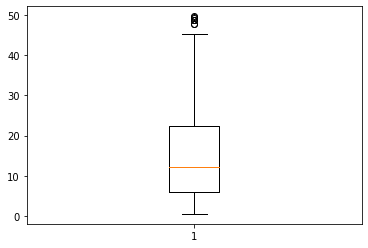

<Figure size 720x504 with 0 Axes>

In [82]:
plt.boxplot(df['gross income'])
fig = plt.figure(figsize =(10, 7))
plt.show()

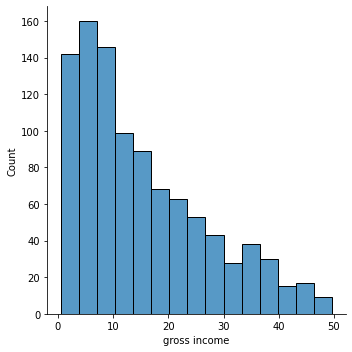

In [83]:
sns.displot(df['gross income'])

In [84]:
# cari 1st quartile
q1 = np.quantile(df['Total'], 0.25)
 
# cari 3rd quartile
q3 = np.quantile(df['Total'], 0.75)
 
# cari iqr region
iqr = q3-q1
 
# cari upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

346.927875 991.7420625 -395.9694375


In [87]:
#karenaoutlier tidak terlalu banyak, maka bisa dihapuskan
outliers = df[(df['Total'] <= lower_bound) | (df['Total'] >= upper_bound)]
outliers.value_counts().sum()

9

In [90]:
#capping kolomg yang sudah dihapus outliernya
df = df[(df['Total'] >= lower_bound) & (df['Total'] <= upper_bound)]

##### Subbab - Product Line

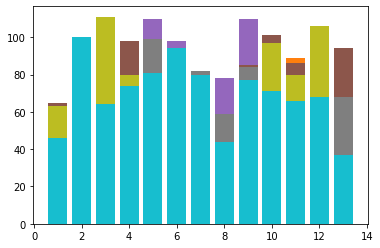

In [57]:
#query pertama yaitu untuk subbab product line
for i in df['Product line']:
    if i == 'Health and beauty':
        item = df[df['Product line'] == 'Health and beauty']
        table = pd.pivot_table(data=item,index='Week',values='Quantity',aggfunc=np.sum)
        plt.bar(table.index, table['Quantity'])
    elif i == 'Electronic accessories':
        item = df[df['Product line'] == 'Electronic accessories']
        table = pd.pivot_table(data=item,index='Week',values='Quantity',aggfunc=np.sum)
        plt.bar(table.index, table['Quantity'])
    elif i == 'Home and lifestyle':
        item = df[df['Product line'] == 'Home and lifestyle']
        table = pd.pivot_table(data=item,index='Week',values='Quantity',aggfunc=np.sum)
        plt.bar(table.index, table['Quantity'])
    elif i == 'Sports and travel':
        item = df[df['Product line'] == 'Sports and travel']
        table = pd.pivot_table(data=item,index='Week',values='Quantity',aggfunc=np.sum)
        plt.bar(table.index, table['Quantity'])
    elif i == 'Food and beverages':
        item = df[df['Product line'] == 'Food and beverages']
        table = pd.pivot_table(data=item,index='Week',values='Quantity',aggfunc=np.sum)
        plt.bar(table.index, table['Quantity'])
    else:
        item = df[df['Product line'] == 'Fashion accessories']
        table = pd.pivot_table(data=item,index='Week',values='Quantity',aggfunc=np.sum)
        plt.bar(table.index, table['Quantity'])
        

hasil visualisasinya akan dipindahkan ke aplikasi yang akan dipresentasikan

In [58]:
#untuk subab
item = df[df['Product line'] == 'Health and beauty']
df2 = item.groupby('Week')[['Quantity', 'Rating']].agg({'Quantity': 'sum',
                                                'Rating':'mean'})

In [59]:
df2

,Quantity,Rating
Week,,
1,65,7.281818
2,14,6.900000
3,42,6.744444
4,98,7.227778
5,40,7.055556
6,92,7.615385
7,62,7.291667
8,51,7.090000
9,85,6.456250


In [60]:
df2.mean()

Quantity    65.692308
Rating       7.005159
dtype: float64

#### Subbab - Consumer

In [61]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,9
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,6


<AxesSubplot:xlabel='Weekday', ylabel='Total'>

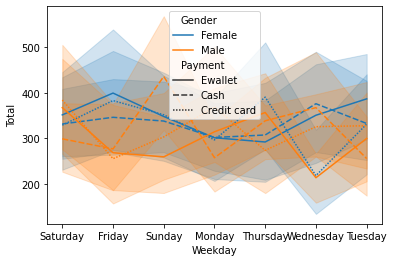

In [62]:
#dari dataset diplot kan untuk mendapatkan hasil yang diinginkan pada bagian consumer
sns.lineplot(x="Weekday", y='Total',
             hue="Gender", style="Payment",
             data=df)

In [63]:
#filtering dataset
data_member = df[df['Customer type'] == 'Member']
data_member

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Weekday,Week
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,4
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36,Ewallet,413.04,4.761905,20.6520,5.8,Monday,9
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2,Thursday,2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2019-02-20,13:27,Credit card,164.52,4.761905,8.2260,5.9,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,2019-03-29,19:12,Ewallet,823.40,4.761905,41.1700,4.3,Friday,13
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.1480,633.1080,2019-01-28,15:46,Credit card,602.96,4.761905,30.1480,8.4,Monday,5
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,2019-02-18,11:40,Ewallet,60.95,4.761905,3.0475,5.9,Monday,8
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7,Saturday,6


<AxesSubplot:xlabel='Weekday', ylabel='Total'>

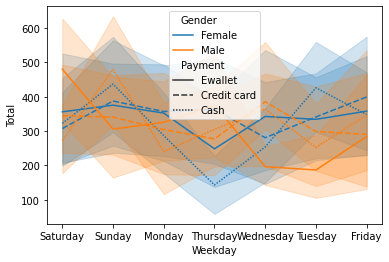

In [64]:
sns.lineplot(x="Weekday", y='Total',
             hue="Gender", style="Payment",
             data=data_member)

#### Subbab - Branch

bab Branch bertujuan untuk mencari gross income rata-rata pada ketiga city

In [65]:
gross = df.groupby('City')['gross income'].sum().reset_index()
gross

,City,gross income
0,Mandalay,5057.0320
1,Naypyitaw,5265.1765
2,Yangon,5057.1605


([<matplotlib.patches.Wedge at 0x1df9a866a40>,
 [Text(0.5634539536285844, 0.9447325770504145, 'Mandalay'),
  Text(-1.0999999996193068, 2.8940030607887106e-05, 'Naypyitaw'),
  Text(0.5634290098984011, -0.9447474534524598, 'Yangon')],
 [Text(0.307338520161046, 0.5153086783911351, '33%'),
  Text(-0.5999999997923491, 1.5785471240665693e-05, '34%'),
  Text(0.3073249144900369, -0.5153167927922507, '33%')])

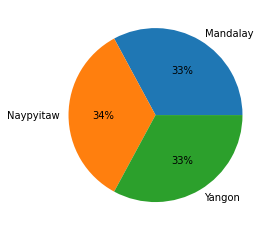

In [66]:
#visualisasi menggunakan pie chart
plt.pie(gross['gross income'], labels=gross['City'], autopct='%.0f%%')

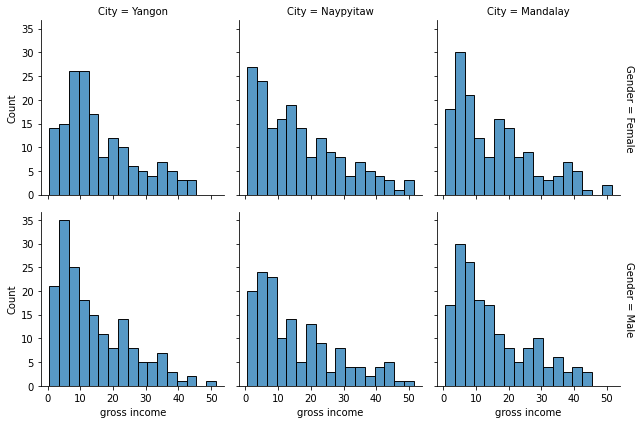

In [67]:
#sns menggunakan displot untuk mendapatkan visualisasi yang diinginkan
sns.displot(
    df, x="gross income", col="City", row="Gender",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

#### Subbab - Transaction

bab ini diperuntukan untuk mencari korelasi diantara kolom pada dateset, sehingga dapat ditarik kesimpulan dari korelasi tersebut

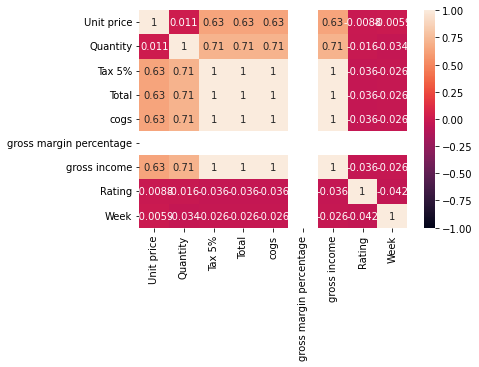

In [68]:
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

#### Hypothesis Testing

In [69]:
#gabungkan dlu gross income dari branch yang kita analisis
gross_A = df[df['Branch'] == 'A'][['Date','gross income']].groupby('Date').sum()
gross_B = df[df['Branch'] == 'B'][['Date','gross income']].groupby('Date').sum()

In [70]:
#cari rata-rata untuk mendapat perbandingan
print('Average gross income Branch A : ${}'.format(np.round(gross_A['gross income'].mean())))
print('Average gross income Branch B: ${}'.format(np.round(gross_B['gross income'].mean())))

Average gross income Branch A : $57.0
Average gross income Branch B: $59.0


dari hasil rata-rata, tidak terlalu ada perbedaan yang siginifikan

In [71]:
#cari p value nya menggunakan two sampel independent
t_stat, p_val = stats.ttest_ind(gross_A,gross_B)
print('P-value:',p_val[0]) 
print('t-statistics:',t_stat[0])

P-value: 0.7377341666768813
t-statistics: -0.33539411807826264


C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\danan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


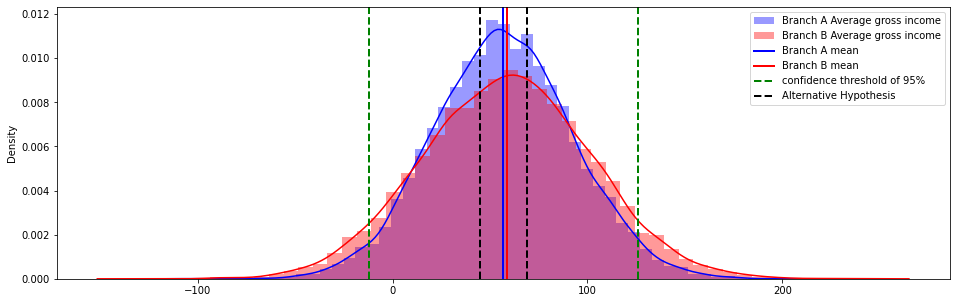

In [72]:
pop_branch_A = np.random.normal(gross_A['gross income'].mean(),gross_A['gross income'].std(),10000)
pop_branch_B = np.random.normal(gross_B['gross income'].mean(),gross_B['gross income'].std(),10000)

ci = stats.norm.interval(0.95, gross_A['gross income'].mean(), gross_A['gross income'].std())
plt.figure(figsize=(16,5))
sns.distplot(pop_branch_A, label='Branch A Average gross income',color='blue')
sns.distplot(pop_branch_B, label='Branch B Average gross income',color='red')

plt.axvline(gross_A['gross income'].mean(), color='blue', linewidth=2, label='Branch A mean')
plt.axvline(gross_B['gross income'].mean(), color='red',  linewidth=2, label='Branch B mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(pop_branch_A.mean()+t_stat[0]*pop_branch_A.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(pop_branch_A.mean()-t_stat[0]*pop_branch_A.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

berdasarkan p-value yang diperoleh maka, dapat disimpulkan bahwa antara Branch A dengan Branch B dilihat dari rata-rata gross incomenya, tidak
erdapat perbedaan secara signifikan, dari nilai t stat nya juga tidak terlalu besar yang berarti antara kedua branch tidak terlalu jauh perbedaanya

#### Data Saving

In [73]:
#save data yang sudah dicleaning 
from pathlib import Path  

filepath = Path('D:/assignment_hacktiv8/git-lecture-dhanandipta/Milestone/deployment/new_supermarket.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

df.to_csv(filepath) 